In [21]:
import sys
!{sys.executable} -m pip install bm3d

import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from bm3d import bm3d 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

    # Fonction pour afficher une image et calculer le PSNR
def display_and_psnr(original, processed, title):
    psnr_value = psnr(original * 255, processed * 255)
    print(f"{title} - PSNR : {psnr_value:.2f}")
    display_image(processed, title)


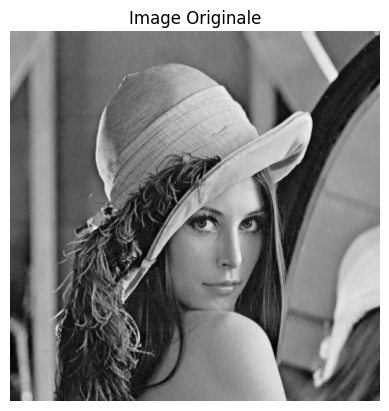

Image bruitée - PSNR : 20.08


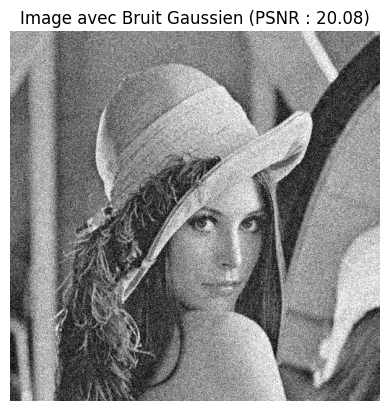


Testing BM3D with sigma_psd = 0.1
Filtre BM3D (sigma_psd=0.1) - PSNR : 31.86


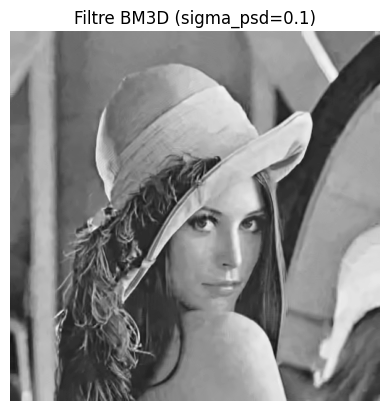


Testing BM3D with sigma_psd = 0.5
Filtre BM3D (sigma_psd=0.5) - PSNR : 27.62


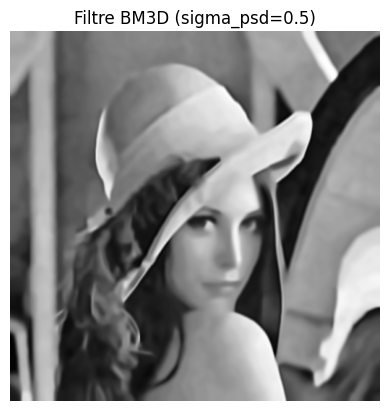


Testing BM3D with sigma_psd = 1
Filtre BM3D (sigma_psd=1) - PSNR : 26.10


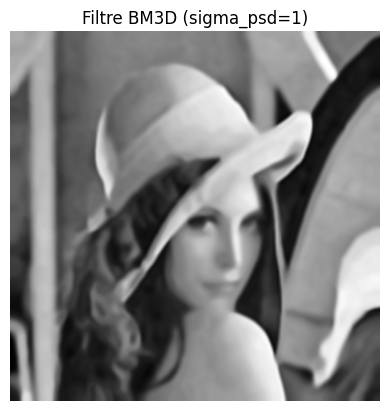


Testing BM3D with sigma_psd = 2
Filtre BM3D (sigma_psd=2) - PSNR : 24.79


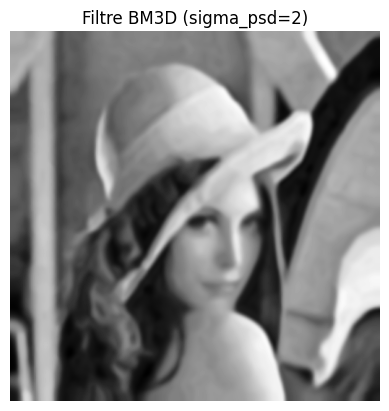


Testing BM3D with sigma_psd = 3
Filtre BM3D (sigma_psd=3) - PSNR : 23.16


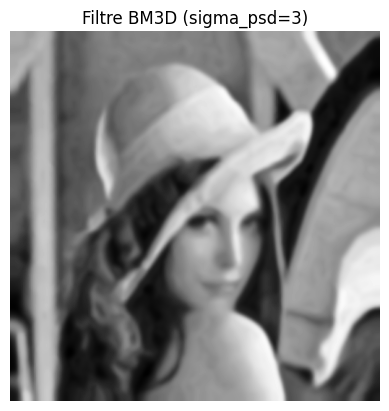

In [23]:
image = skimage.io.imread("lena.pgm", as_gray=True) / 255.0
display_image(image, "Image Originale")

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)

psnr_noised = psnr(image * 255, image_noised * 255)
print(f"Image bruitée - PSNR : {psnr_noised:.2f}")
display_image(image_noised, f"Image avec Bruit Gaussien (PSNR : {psnr_noised:.2f})")

for sigma_psd in [0.1,0.5,1, 2, 3]:
    print(f"\nTesting BM3D with sigma_psd = {sigma_psd}")
    image_filtree = bm3d(image_noised, sigma_psd)
    display_and_psnr(image, image_filtree, f"Filtre BM3D (sigma_psd={sigma_psd})")
